# New York City: SAT Results, 2016

<br></br>
<i>The Scholastic Aptitude Test (SAT) is an exam U.S. high school students take before applying to college. The SAT consists of three sections, each with 800 possible points, making 2,400 the highest possible combined score. Colleges factor SAT scores when deciding who to admit. Organizations often rank high schools by their average SAT scores. High average SAT scores are usually indicative of a good school. The scores are also considered a measure of overall school district quality.
    
SAT's fairness to marginalized groups is a controversial issue in US education. Investigating correlations between SAT scores and key demographic factors requires a dive into big societal issues concerning race, gender, and wealth gap (to name a few).</i>

## 1. Dataset

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) available online, as well as the demographics for each high school. Here are the datasets used in this notebook:

| Source | File(s) | Description |
| :--- | :--- | :--- |
| [Scores by School](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) | sat_results.csv | SAT scores for each high school in New York City
| [School Attendance](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) | (no file) | Attendance information for each school in New York City
| [Class Size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) | class_size.csv | Information on class size for each school
| [AP Test Result](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) | ap_2010.csv | **Advanced Placement (AP)** exam results for each high school; passing an optional AP exam in a particular subject can earn a student college credit in that subject
| [Graduation Outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) | graduation.csv | The percentage of students who graduated, and other outcome information
| [Demographics and Directory](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) | demographics.csv, hs_directory.csv | Demographic information for each school; a directory of high schools
| [School Survey](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) | survey_all.txt, survey_d75.txt | Surveys of parents, teachers, and students at each school

Some notes prior to reading the datasets:

- Although the total SAT score has changed a few times, score datasets for this project is based on a 2,400 total. 
- Each school in New York City has a unique code called a district borough number, or DBN.
- New York City schools fall within several different school districts. Aggregating data by district allows mapping data to plot district-by-district differences.
- Since only high school students take the SAT, certain data sets need to be cleaned to only include high schools.
- New York City has a significant immigrant population, which makes it one of the most diverse in the country. Because of this, there is usually enough data to compare or correlate demographic factors such as race, income, and gender with SAT scores. The NYC SAT scores may provide enough data to unearth biases in SAT.


## 2. Reading the Data

To have a convenient way of storing and referencing these datasets, each file will be saved as a pandas dataframe, and then store all of the dataframes in a dictionary. The first part involves reading the .csv files, which can be seen below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

d = {}
d_files = ['ap_2010.csv'
    , 'class_size.csv'
    , 'demographics.csv'
    , 'graduation.csv'
    , 'hs_directory.csv'
    , 'sat_results.csv'
]

for f in d_files:
    file = pd.read_csv('datasets/schools/{}'.format(f))
    d[f.replace('.csv', '')] = file

In [2]:
ft = '''{0}: 
- rows: {1:5,} 
- cols: {2:5,} 
'''
# print dataframe shapes
for k in d:
    print(ft.format(k,d[k].shape[0],d[k].shape[1]))

ap_2010: 
- rows:   258 
- cols:     5 

class_size: 
- rows: 27,611 
- cols:    16 

demographics: 
- rows: 10,075 
- cols:    38 

graduation: 
- rows: 25,096 
- cols:    23 

hs_directory: 
- rows:   435 
- cols:    58 

sat_results: 
- rows:   478 
- cols:     6 



### 2.1 Reading CSV Files

All six files (`ap_2010.csv`, `class_size.csv`, `demographics.csv`, `graduation.csv`, `hs_directory.csv`, and `sat_results.csv`) have been added to the dictionary `d`. Below are sample data per dataframe.

In [3]:
d['ap_2010'].head(10).T

,0,1,2,3,4,5,6,7,8,9
DBN,01M448,01M450,01M515,01M539,02M296,02M298,02M300,02M303,02M305,02M308
SchoolName,UNIVERSITY NEIGHBORHOOD H.S.,EAST SIDE COMMUNITY HS,LOWER EASTSIDE PREP,"NEW EXPLORATIONS SCI,TECH,MATH",High School of Hospitality Management,Pace High School,"Urban Assembly School of Design and Construction,","Facing History School, The","Urban Assembly Academy of Government and Law, The",Lower Manhattan Arts Academy
AP Test Takers,39,19,24,255,s,21,99,42,25,s
Total Exams Taken,49,21,26,377,s,21,117,44,37,s
Number of Exams with scores 3 4 or 5,10,s,24,191,s,s,10,s,15,s


In [4]:
d['class_size'].head(10).T

,0,1,2,3,4,5,6,7,8,9
CSD,1,1,1,1,1,1,1,1,1,1
BOROUGH,M,M,M,M,M,M,M,M,M,M
SCHOOL CODE,M015,M015,M015,M015,M015,M015,M015,M015,M015,M015
SCHOOL NAME,P.S. 015 Roberto Clemente,P.S. 015 Roberto Clemente,P.S. 015 Roberto Clemente,P.S. 015 Roberto Clemente,P.S. 015 Roberto Clemente,P.S. 015 Roberto Clemente,P.S. 015 Roberto Clemente,P.S. 015 Roberto Clemente,P.S. 015 Roberto Clemente,P.S. 015 Roberto Clemente
GRADE,0K,0K,01,01,02,02,03,03,04,05
PROGRAM TYPE,GEN ED,CTT,GEN ED,CTT,GEN ED,CTT,GEN ED,CTT,GEN ED,GEN ED
CORE SUBJECT (MS CORE and 9-12 ONLY),-,-,-,-,-,-,-,-,-,-
CORE COURSE (MS CORE and 9-12 ONLY),-,-,-,-,-,-,-,-,-,-
SERVICE CATEGORY(K-9* ONLY),-,-,-,-,-,-,-,-,-,-
NUMBER OF STUDENTS / SEATS FILLED,19,21,17,17,15,17,12,15,26,27


In [5]:
d['class_size'].iloc[:,4].value_counts()

09-12      10644
MS Core     4762
0K-09       1384
0K          1237
01          1185
02          1167
03          1143
04          1140
05          1086
06           846
07           778
08           735
09            20
Name: GRADE , dtype: int64

The `class size` dataframe is one of those that need to be streamlined to only include high school entries.

In [6]:
d['demographics'].head(10).T

,0,1,2,3,4,5,6,7,8,9
DBN,01M015,01M015,01M015,01M015,01M015,01M015,01M015,01M019,01M019,01M019
Name,P.S. 015 ROBERTO CLEMENTE,P.S. 015 ROBERTO CLEMENTE,P.S. 015 ROBERTO CLEMENTE,P.S. 015 ROBERTO CLEMENTE,P.S. 015 ROBERTO CLEMENTE,P.S. 015 ROBERTO CLEMENTE,P.S. 015 ROBERTO CLEMENTE,P.S. 019 ASHER LEVY,P.S. 019 ASHER LEVY,P.S. 019 ASHER LEVY
schoolyear,20052006,20062007,20072008,20082009,20092010,20102011,20112012,20052006,20062007,20072008
fl_percent,89.4,89.4,89.4,89.4,,,NaN,61.5,61.5,61.5
frl_percent,NaN,NaN,NaN,NaN,96.5,96.5,89.4,NaN,NaN,NaN
total_enrollment,281,243,261,252,208,203,189,402,312,338
prek,15,15,18,17,16,13,13,15,13,28
k,36,29,43,37,40,37,31,43,37,48
grade1,40,39,39,44,28,35,35,55,45,46
grade2,33,38,36,32,32,33,28,53,52,47


In [7]:
d['graduation'].head(6).T

,0,1,2,3,4,5
Demographic,Total Cohort,Total Cohort,Total Cohort,Total Cohort,Total Cohort,Total Cohort
DBN,01M292,01M292,01M292,01M292,01M292,01M448
School Name,HENRY STREET SCHOOL FOR INTERNATIONAL,HENRY STREET SCHOOL FOR INTERNATIONAL,HENRY STREET SCHOOL FOR INTERNATIONAL,HENRY STREET SCHOOL FOR INTERNATIONAL,HENRY STREET SCHOOL FOR INTERNATIONAL,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
Cohort,2003,2004,2005,2006,2006 Aug,2001
Total Cohort,5,55,64,78,78,64
Total Grads - n,s,37,43,43,44,46
Total Grads - % of cohort,s,67.3%,67.2%,55.1%,56.4%,71.900000000000006%
Total Regents - n,s,17,27,36,37,32
Total Regents - % of cohort,s,30.9%,42.2%,46.2%,47.4%,50%
Total Regents - % of grads,s,45.9%,62.8%,83.7%,84.1%,69.599999999999994%


The `graduation` dataframe needs to be filtered to only include `2006` cohorts.

In [8]:
d['graduation'][(d['graduation']['DBN'] == '01M448') & (d['graduation']['Cohort'] == '2006')].head().T

,10,2506,4541,7019,9488
Demographic,Total Cohort,English Language Learners,English Proficient Students,Special Education Students,General Education Students
DBN,01M448,01M448,01M448,01M448,01M448
School Name,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
Cohort,2006,2006,2006,2006,2006
Total Cohort,124,3,121,25,99
Total Grads - n,53,s,52,5,48
Total Grads - % of cohort,42.7%,s,43%,20%,48.5%
Total Regents - n,42,s,41,2,40
Total Regents - % of cohort,33.9%,s,33.9%,8%,40.4%
Total Regents - % of grads,79.2%,s,78.8%,40%,83.3%


In [9]:
d['hs_directory'].head(4).T

,0,1,2,3
dbn,17K548,09X543,09X327,02M280
school_name,Brooklyn School for Music & Theatre,High School for Violin and Dance,Comprehensive Model School Project M.S. 327,Manhattan Early College School for Advertising
boro,Brooklyn,Bronx,Bronx,Manhattan
building_code,K440,X400,X240,M520
phone_number,718-230-6250,718-842-0687,718-294-8111,718-935-3477
fax_number,718-230-6262,718-589-9849,718-294-8109,NaN
grade_span_min,9,9,6,9
grade_span_max,12,12,12,10
expgrade_span_min,NaN,NaN,NaN,9
expgrade_span_max,NaN,NaN,NaN,14


In [10]:
d['sat_results'].head(10).T

,0,1,2,3,4,5,6,7,8,9
DBN,01M292,01M448,01M450,01M458,01M509,01M515,01M539,01M650,01M696,02M047
SCHOOL NAME,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,EAST SIDE COMMUNITY SCHOOL,FORSYTH SATELLITE ACADEMY,MARTA VALLE HIGH SCHOOL,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",CASCADES HIGH SCHOOL,BARD HIGH SCHOOL EARLY COLLEGE,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...
Num of SAT Test Takers,29,91,70,7,44,112,159,18,130,16
SAT Critical Reading Avg. Score,355,383,377,414,390,332,522,417,624,395
SAT Math Avg. Score,404,423,402,401,433,557,574,418,604,400
SAT Writing Avg. Score,363,366,370,359,384,316,525,411,628,387


### 2.2 Reading Survey Files

Because of the difference in file type, the survey files `survey_all.txt` and `survey_d75.txt` are handled separately. These two files also need to be combined and trimmed.

In [11]:
all_survey = pd.read_csv('datasets/schools/survey_all.txt', delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv('datasets/schools/survey_d75.txt', delimiter='\t', encoding='windows-1252')

In [12]:
all_survey.head(6).T

,0,1,2,3,4,5
dbn,01M015,01M019,01M020,01M034,01M063,01M064
bn,M015,M019,M020,M034,M063,M064
schoolname,P.S. 015 Roberto Clemente,P.S. 019 Asher Levy,P.S. 020 Anna Silver,P.S. 034 Franklin D. Roosevelt,P.S. 063 William McKinley,P.S. 064 Robert Simon
d75,0,0,0,0,0,0
studentssurveyed,No,No,No,Yes,No,No
...,...,...,...,...,...,...
s_N_q14f_4,NaN,NaN,NaN,29,NaN,NaN
s_N_q14g_1,NaN,NaN,NaN,31,NaN,NaN
s_N_q14g_2,NaN,NaN,NaN,46,NaN,NaN
s_N_q14g_3,NaN,NaN,NaN,16,NaN,NaN


In [13]:
d75_survey.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
dbn,75K004,75K036,75K053,75K077,75K140,75K141,75K231,75K368,75K369,75K370,75K371,75K372,75K373,75K396,75K721
bn,K004,K036,K053,K077,K140,K141,K231,K368,K369,K370,K371,K372,K373,K396,K721
schoolname,P.S. K004,P.S. 36,P.S. K053,P.S. K077,P.S. K140,P.S. K141,P.S. K231,P.S. 368,P.S. K369 - Coy L. Cox School,P.S. 370,P.S. 371 - Lillian L. Rashkis,P.S. 372 -The Children's School,P.S. 373 - Brooklyn Transition Center,P.S. K396,P.S. K721 - Brooklyn Occupational Training Center
d75,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
studentssurveyed,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_q14_7,0,6,13,10,0,0,0,6,13,30,14,NaN,14,0,17
s_q14_8,0,1,11,6,0,2,0,6,4,9,10,NaN,19,0,15
s_q14_9,0,2,2,4,0,0,0,4,2,9,1,NaN,23,4,9
s_q14_10,0,0,0,7,0,0,0,0,0,0,1,NaN,10,0,9


In [14]:
survey = pd.concat([all_survey, d75_survey], axis=0, sort=False)
survey.head(7).T

,0,1,2,3,4,5,6
dbn,01M015,01M019,01M020,01M034,01M063,01M064,01M110
bn,M015,M019,M020,M034,M063,M064,M110
schoolname,P.S. 015 Roberto Clemente,P.S. 019 Asher Levy,P.S. 020 Anna Silver,P.S. 034 Franklin D. Roosevelt,P.S. 063 William McKinley,P.S. 064 Robert Simon,P.S. 110 Florence Nightingale
d75,0,0,0,0,0,0,0
studentssurveyed,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...
s_q14_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_q14_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_q14_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_q14_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Cleaning the Data

The following updates are necessary to make the data streamlined for analysis:
- The `survey` dataframe needs a `DBN` column, and significantly fewer columns.
- The `class_size` dataframe needs a `DBN` column.
- The `sat_results` dataframe needs a total SAT score.
- The `hs_directory` dataframe needs longtitude and latitude coordinates.

### 3.1 Filtering Survey Columns

The `survey` dataframe needs a `DBN` column to match the header on other datasets. To accomplish this, a `DBN` column needs to be created from the existing `dbn` column, and then the `dbn` column can be dropped.

In [15]:
# create DBN column
survey['DBN'] = survey['dbn']

There are over 2000 columns in `survey`, but most of these columns are unnecessary for the analysis. To streamline the data for later use, only the fields in the [original data dictionary](https://data.cityofnewyork.us/api/views/mnz3-dyi8/files/aa68d821-4dbb-4eb2-9448-3d8cbbad5044?download=true&filename=Survey%20Data%20Dictionary.xls), are retained. These fields are as follows:

| Column | Description |
| :--- | :--- | 
| dbn | School identification code (district borough number) |
| rr_s | Student Response Rate |
| rr_t | Teacher Response Rate |
| rr_p | Parent Response Rate |
| N_s | Number of student respondents |
| N_t | Number of teacher respondents |
| N_p | Number of parent respondents |
| nr_s | Number of eligible students |
| nr_t | Number of eligible teachers |
| nr_p | Number of eligible parents |
| saf_p_10 | Safety and Respect score based on parent responses |
| com_p_10 | Communication score based on parent responses |
| eng_p_10 | Engagement score based on parent responses |
| aca_p_10 | Academic expectations score based on parent responses |
| saf_t_10 | Safety and Respect score based on teacher responses |
| com_t_10 | Communication score based on teacher responses |
| eng_t_10 | Engagement score based on teacher responses |
| aca_t_10 | Academic expectations score based on teacher responses |
| saf_s_10 | Safety and Respect score based on student responses |
| com_s_10 | Communication score based on student responses |
| eng_s_10 | Engagement score based on student responses |
| aca_s_10 | Academic expectations score based on student responses |
| saf_tot_10 | Safety and Respect total score |
| com_tot_10 | Communication total score |
| eng_tot_10 | Engagement total score |
| aca_tot_10 | Academic Expectations total score |

The rest of the columns refer to scores, percentages and counts of responses to survey questions. Their granularity provide little to no value to the high-level analysis of this notebook.

In [16]:
# retain relevant survey fields
survey_fields = ['DBN', 'rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 
                 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 
                 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 
                 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11', 
                 'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11']

survey = survey[survey_fields]

In [17]:
# assign columns back to main dataframe
d['survey'] = survey
d['survey'].head().T

,0,1,2,3,4
DBN,01M015,01M019,01M020,01M034,01M063
rr_s,NaN,NaN,NaN,89,NaN
rr_t,88,100,88,73,100
rr_p,60,60,73,50,60
N_s,NaN,NaN,NaN,145,NaN
N_t,22,34,42,29,23
N_p,90,161,367,151,90
saf_p_11,8.5,8.4,8.9,8.8,8.7
com_p_11,7.6,7.6,8.3,8.2,7.9
eng_p_11,7.5,7.6,8.3,8,8.1


### 3.2 Inserting DBN Fields

To unify the naming conventions across datasets, a `DBN` column in `hs_directory` needs to get created from the `dbn` column.

In [18]:
# create a 'DBN' column in 'hs_directory'
d['hs_directory']['DBN'] = d['hs_directory']['dbn']

After exploring the datasets, it seems that a `DBN` column is present in all but `class_size`. Here are the first few rows of the dataset:

In [19]:
d['class_size'][d['class_size'].iloc[:,2] == 'M448'][:5]

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
356,1,M,M448,University Neighborhood High School,09-12,GEN ED,ENGLISH,English 9,-,53.0,3.0,17.7,13.0,27.0,STARS,NaN
357,1,M,M448,University Neighborhood High School,09-12,GEN ED,ENGLISH,English 10,-,83.0,5.0,16.6,10.0,26.0,STARS,NaN
358,1,M,M448,University Neighborhood High School,09-12,GEN ED,ENGLISH,English 11,-,85.0,4.0,21.3,16.0,26.0,STARS,NaN
359,1,M,M448,University Neighborhood High School,09-12,GEN ED,ENGLISH,English 12,-,122.0,6.0,20.3,13.0,29.0,STARS,NaN
360,1,M,M448,University Neighborhood High School,09-12,GEN ED,MATH,Integrated Algebra,-,142.0,6.0,23.7,17.0,31.0,STARS,NaN


On the other hand, below is the data for the same high school from `sat_results`, which does have a DBN column.

In [20]:
# use 'University Neighborhood High School' as filter
sample_school = d['class_size'][d['class_size'].iloc[:,2] == 'M448'][:5]['SCHOOL NAME'].unique()[0].upper()
d['sat_results'][d['sat_results']['SCHOOL NAME'] == sample_school]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366


Based on these results, it seems that the DBN in the `sat_results` is just a combination of the `CSD` and `SCHOOL CODE` columns in the `class_size` data. The main difference is that the `DBN` has a zero padding, so `CSD` always has two digits when combined. It means a leading 0 needs to be added to the CSD if the CSD is less than two digits long.

In [21]:
# add a leading 0 if CSD is less than 2 digits long
def fill_num(n):
    if len(str(n)) == 2:
        return str(n)
    else:
        return str(n).zfill(2)

# create a 'padded_csd' column, then a 'DBN' column
d['class_size']['padded_csd'] = d['class_size']['CSD'].apply(fill_num)
d['class_size']['DBN'] = d['class_size']['padded_csd'] + d['class_size']['SCHOOL CODE']

# sample values from the new 'DBN' column
d['class_size']['DBN'].value_counts().head()

15K429    57
09X505    56
09X517    56
15K448    52
21K690    52
Name: DBN, dtype: int64

### 3.3 Combining SAT Scores

Before merging data sets, it's useful to compute for the total SAT score, which can be incredibly useful in further analysis, especially in looking for correlations between key demographic. For the computation below, the scores are converted into numeric, then combined.

In [22]:
# create combined SAT score
sats = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

for s in sats:
    d['sat_results'][s] = pd.to_numeric(d['sat_results'][s], errors='coerce')

d['sat_results']['sat_score'] = d['sat_results'][sats[0]] + d['sat_results'][sats[1]] + d['sat_results'][sats[2]]
d['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

### 3.4 Parsing Geographic Coordinates

The latitude and longitude coordinates for each school needs to be parsed to map the schools, and uncover any geographic patterns in the data.

In [23]:
# create lat columns
def find_lat(loc):
    c = re.findall('\(.+, .+\)', loc)
    lat = c[0].split(',')[0].replace('(','')
    return lat

# create lon columns
def find_lon(loc):
    c = re.findall('\(.+, .+\)', loc)
    lon = c[0].split(',')[1].replace(')','').strip()
    return lon

In [24]:
d['hs_directory']['lat'] = d['hs_directory']['Location 1'].apply(find_lat)
d['hs_directory']['lon'] = d['hs_directory']['Location 1'].apply(find_lon)

d['hs_directory']['lon'] = pd.to_numeric(d['hs_directory']['lon'], errors='coerce')
d['hs_directory']['lat'] = pd.to_numeric(d['hs_directory']['lat'], errors='coerce')

d['hs_directory'][['lat', 'lon']].head()

,lat,lon
0,40.670299,-73.961648
1,40.827603,-73.904475
2,40.842414,-73.916162
3,40.710679,-74.000807
4,40.718810,-73.806500


## 4. Condensing Data

While the main dataset `sat_results` has unique `DBN` values for every high school in New York City, other datasets aren't as clean. A single row in the `sat_results` data set may match multiple rows in the `class_size` data set, for example. To resolve this issue, `class_size`, `graduation`, and `demographics` need to be flattened until each row has a unique `DBN`.

### 4.1 Condensing Class Size

In [25]:
# condense 'class_size' to Grade 9 - 12 Gen Ed classes
class_size = d['class_size']
class_size = class_size[(class_size['GRADE '] == '09-12') & (class_size['PROGRAM TYPE'] == 'GEN ED')]
class_size.head().T

,225,226,227,228,229
CSD,1,1,1,1,1
BOROUGH,M,M,M,M,M
SCHOOL CODE,M292,M292,M292,M292,M292
SCHOOL NAME,Henry Street School for International Studies,Henry Street School for International Studies,Henry Street School for International Studies,Henry Street School for International Studies,Henry Street School for International Studies
GRADE,09-12,09-12,09-12,09-12,09-12
PROGRAM TYPE,GEN ED,GEN ED,GEN ED,GEN ED,GEN ED
CORE SUBJECT (MS CORE and 9-12 ONLY),ENGLISH,ENGLISH,ENGLISH,ENGLISH,MATH
CORE COURSE (MS CORE and 9-12 ONLY),English 9,English 10,English 11,English 12,Integrated Algebra
SERVICE CATEGORY(K-9* ONLY),-,-,-,-,-
NUMBER OF STUDENTS / SEATS FILLED,63,79,38,69,53


`DBN` still isn't completely unique due to the `CORE COURSE (MS CORE and 9-12 ONLY)` and `CORE SUBJECT (MS CORE and 9-12 ONLY)` columns, which seem to pertain to different kinds of classes. For example, here are the unique values for `CORE SUBJECT (MS CORE and 9-12 ONLY)`:

In [26]:
class_size.iloc[:,6].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

This column only seems to include certain subjects. Class size data needs to include every single class a school offer, not just a subset. Computing for average class size across all of the classes a school offers can lead to unique DBN values, while incorporating as much data as possible into the average.

In [27]:
# compute for average class size to make 'DBN' unique
class_size = class_size.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace=True)
d['class_size'] = class_size
d['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


### 4.2 Condensing Demographics

For the `demographics` dataset, `schoolyear` is the only column that prevents DBNs from being unique. Selecting rows where `schoolyear` is 20112012 gives the most recent year of data and matches the SAT results data.

In [28]:
# select rows where school year is 2011-2012
d['demographics'] = d['demographics'][d['demographics']['schoolyear'] == 20112012]
d['demographics']['schoolyear'].value_counts()

20112012    1509
Name: schoolyear, dtype: int64

### 4.3 Condensing Graduation

Similarly, for `graduation` dataset, the `Demographic` and `Cohort` columns are what prevent `DBN` from being unique. To review: 
- `Cohort` refers to the year the data represents
- `Demographic` refer to a specific demographic group 

In this case, the most recent cohort available is `2006`. Since data from the full cohort is needed, only rows where Demographic is `Total Cohort` will be included.

In [29]:
# select rows where cohort is 2006 and demographic is total cohort
d['graduation'] = d['graduation'][d['graduation']['Cohort'] == '2006']
d['graduation'] = d['graduation'][d['graduation']['Demographic'] == 'Total Cohort']
d['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


### 4.4 Converting AP Test Scores

The Advanced Placement (AP) exams are taken before applying to college. AP exams have a 1 to 5 scale; 3 or higher is a passing score. There are several AP exams, each corresponding to a school subject. Students who earn high scores in these exams may receive college credit. Students who take AP exams usually come from academically challenging institutions; AP exams are rarer in schools that lack funding or academic rigor.

It is interesting to verify whether a correlation between AP exam results and SAT scores exist. To determine this, there are three columns in the `ap_2010` dataset that need to be converted from strings to numeric values. They are:

- AP Test Takers (note that there's a trailing space in the column name)
- Total Exams Taken
- Number of Exams with scores 3 4 or 5

In [30]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for c in cols:
    d['ap_2010'][c] = pd.to_numeric(d['ap_2010'][c], errors='coerce')
d['ap_2010'].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

## 5. Combining the Data

With the datasets cleaned, it is possible to combine the datasets. Because this project is concerned with determing demographic factors that correlate with SAT score, it is essential to preserve as many rows as possible from `sat_results`, while minimizing null values.

### 5.1 Performing Left Joins

Some datasets have DBN values that are almost identical to those in `sat_results`. Those data sets also have information that must be kept. For example, most of the analysis would be impossible if a significant number of rows were missing from `demographics`. Doing inner joins help mitigate missing data. The series of joins start with left joins, as demonstrated below.

In [31]:
combined = d['sat_results']
combined = combined.merge(right=d['ap_2010'], on='DBN', how='left')
combined = combined.merge(right=d['graduation'], on='DBN', how='left')
combined.head().T

,0,1,2,3,4
DBN,01M292,01M448,01M450,01M458,01M509
SCHOOL NAME,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,EAST SIDE COMMUNITY SCHOOL,FORSYTH SATELLITE ACADEMY,MARTA VALLE HIGH SCHOOL
Num of SAT Test Takers,29,91,70,7,44
SAT Critical Reading Avg. Score,355,383,377,414,390
SAT Math Avg. Score,404,423,402,401,433
SAT Writing Avg. Score,363,366,370,359,384
sat_score,1122,1172,1149,1174,1207
SchoolName,NaN,UNIVERSITY NEIGHBORHOOD H.S.,EAST SIDE COMMUNITY HS,NaN,NaN
AP Test Takers,NaN,39,19,NaN,NaN
Total Exams Taken,NaN,49,21,NaN,NaN


### 5.2 Performing Inner Joins

After the left joins, `class_size`, `demographics`, `survey`, and `hs_directory` still need to be joined to `combined`. The inner join needs to be used because these files contain more valuable information to the analysis, and because these datasets have fewer missing `DBN` values.

In [32]:
# perform inner joins
to_merge = ['class_size', 'demographics', 'survey', 'hs_directory']
for m in to_merge:
    combined = combined.merge(d[m], on='DBN', how='inner')
    
combined.shape

(363, 159)

### 5.3 Filling in Missing Values

The inner joins resulted in 116 fewer rows in `sat_results`. On the other hand, the left joins lead to more columns having null (NaN) values, which may away be replaced with 0. Having imputable null values is a better trade-off against the possible loss of data from dropping all the rows with missing information. The latter option wouldn't have left many high schools in the data set.

In [33]:
# fill missing values with the mean where possible, then 0
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

# for c in combined.columns:
#     combined[c] = pd.to_numeric(combined[c], errors='ignore')
    
# combined.dtypes

### 5.4 Adding a School District Column for Mapping

Cleaning and combining the data is complete. Now, there is a single dataframe for analysis. However, understanding the numbers on a school district level may be an insightful approach to the data. In this case, it may be strategic to create a column for the school district, using the first two characters of the `DBN`.

In [34]:
# add a school district column for mapping
def extract_distric(n):
    return n[:2]

combined['school_dist'] = combined['DBN'].apply(extract_distric)

In [35]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041,01
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673,01
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426,01


## 6. Analyzing and Visualizing the Data

Now that the dataframe is ready for analysis, the first thing that can be done is to surface correlations between any of the columns and `sat_score`. Doing this will help determine which columns might be interesting to plot out, or investigate further.

### 6.1 Finding Correlations

Because the end goal is to explore SAT fairness, a strong (positive or negative) correlation between a demographic factor and SAT score would be a signal for further investigation. For example, if men showed a tendency to score higher on the SAT, it might warranted an investigation towards a male bias.

In [36]:
# create dataframe for SAT score correlations
correlations = combined.corr()
correlations = correlations['sat_score']

In [37]:
correlations[:22]

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

In [38]:
correlations[22:38]

sped_percent   -0.448170
asian_num       0.475445
asian_per       0.570730
black_num       0.027979
black_per      -0.284139
hispanic_num    0.025744
hispanic_per   -0.396985
white_num       0.449559
white_per       0.620718
male_num        0.325520
male_per       -0.112062
female_num      0.388631
female_per      0.112108
rr_s            0.232199
rr_t           -0.023386
rr_p            0.047925
Name: sat_score, dtype: float64

In [39]:
correlations[39:]

N_t                  0.291463
N_p                  0.421530
saf_p_11             0.122913
com_p_11            -0.115073
eng_p_11             0.020254
aca_p_11             0.035155
saf_t_11             0.313810
com_t_11             0.082419
eng_t_11             0.036906
aca_t_11             0.132348
saf_s_11             0.337639
com_s_11             0.187370
eng_s_11             0.213822
aca_s_11             0.339435
saf_tot_11           0.318753
com_tot_11           0.077310
eng_tot_11           0.100102
aca_tot_11           0.190966
grade_span_max            NaN
expgrade_span_max         NaN
zip                 -0.063977
total_students       0.407827
number_programs      0.117012
priority08                NaN
priority09                NaN
priority10                NaN
lat                 -0.121029
lon                 -0.132222
Name: sat_score, dtype: float64

Unsurprisingly, `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, and `SAT Writing Avg. Score` are strongly correlated with `sat_score`.

Other observations include:

- `total_enrollment` has a strong positive correlation with `sat_score`, which indicates that larger schools tend to do better on the SAT. This is somewhat surprising because smaller schools — where students receive more attention — should logically have higher scores.
- Other proxies for enrollment correlate similarly. These include `total_students`, `N_s`, `N_p`, `N_t`, `AP Test Takers`, `Total Exams Taken`, and `NUMBER OF SECTIONS`.
- Both the percentage of females (`female_per`) and number of females (`female_num`) at a school correlate positively with SAT score, whereas the percentage of males (`male_per`) and the number of males (`male_num`) correlate negatively. This could indicate that women do better on the SAT than men.
- Teacher and student ratings of school safety (`saf_t_11`, and `saf_s_11`) correlate with `sat_score`.
- Student ratings of school academic standards (`aca_s_11`) correlate with `sat_score`, but this does not hold for ratings from teachers and parents (`aca_p_11` and `aca_t_11`).
- There is significant racial inequality in SAT scores (`white_per`, `asian_per`, `black_per`, `hispanic_per`).
- The percentage of English language learners at the school (`ell_percent`, `frl_percent`) has a strong negative correlation with SAT scores.

### 6.2 Plotting Enrollment

Because enrollment seems to have such a strong correlation, below is a scatterplot of `total_enrollment` vs `sat_score`.

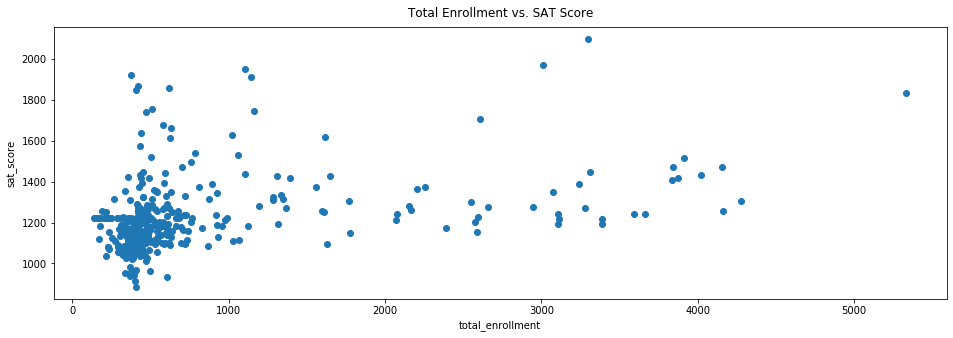

In [40]:
x = 'total_enrollment'
y = 'sat_score'

plt.figure(figsize=(16,5))
plt.scatter(x=combined[x], y=combined[y])
plt.title('Total Enrollment vs. SAT Score', pad=10)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Judging from the plot above, it doesn't appear that there's an extremely strong correlation between `sat_score` and `total_enrollment`. If there was a very strong correlation, most (if not all) of the points would line up.

There's an interesting cluster of points at the bottom left where `total_enrollment` and `sat_score` are both low. This cluster may be what's making the correlation so high. It's worth extracting the names of the schools in this cluster for further research.

In [41]:
low_enrollment = combined[(combined[x] < 1000) & (combined[y] < 1000)]
low_enrollment['School Name']

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

It looks like international schools with low enrollments are impacting the enrollment and SAT scores correlation. Most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually `ell_percent` that correlates strongly with `sat_score`, rather than `total_enrollment`. To explore this relationship further, below is a plot for `ell_percent` vs `sat_score`.

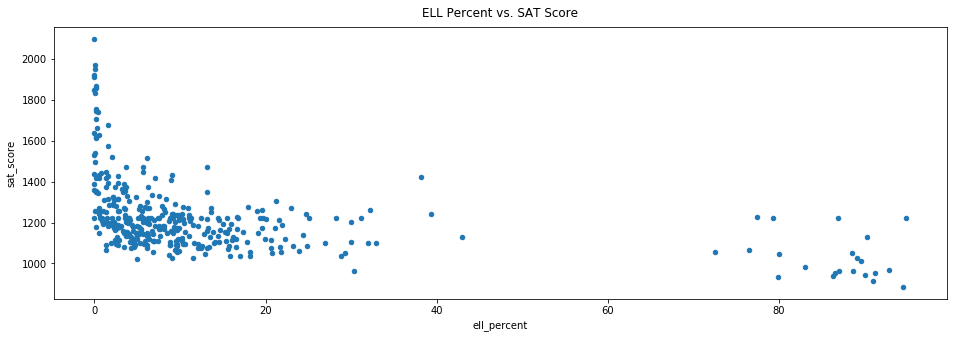

In [42]:
combined.plot.scatter(x='ell_percent', y='sat_score', figsize=(16,5))
plt.title('ELL Percent vs. SAT Score', pad=10)
plt.show()

It looks like `ell_percent` correlates with `sat_score` more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high `ell_percent` values and low `sat_score` values. This cluster represents the same group of international high schools mentioned earlier.

In order to further explore this relationship, the next step is to map out `ell_percent` by school district. The map would then show which areas of the city have a lot of English language learners.

### 6.3 Mapping the Schools

Since the `lat` and `lon` columns have been generated and added to the dataframe, the coordinates can be used to plot all of the schools on a map of New York City. A sample map with the plotting can be found below.

In [43]:
from mpl_toolkits.basemap import Basemap

longitudes = combined['lon'].tolist()
latitudes = combined['lat'].tolist()

m = Basemap(
    projection = 'merc', 
    resolution = 'i',
    llcrnrlat = 40.496044, 
    urcrnrlat = 40.915256, 
    llcrnrlon = -74.255735, 
    urcrnrlon = -73.700272
)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


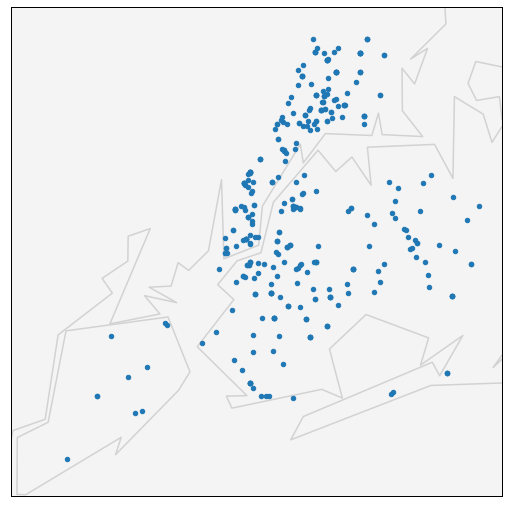

In [44]:
plt.figure(figsize=(9,9))
m.drawmapboundary(fill_color='#f4f4f4')
m.drawcoastlines(color='#d2d2d2', linewidth=1.5)
m.drawrivers(color='#d2d2d2', linewidth=1.5)
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)
plt.show()

It seems like the school density is highest in Manhattan (the top of the map), and lower in Brooklyn, the Bronx, Queens, and Staten Island.

### 6.4 Plotting Out Statistics

Now that the school locations have been plotted, it becomes possible to display meaningful information on the maps, such as the percentage of English language learners by area. The plot below uses yellow if there is a high `ell_percent` and green if the school has a  and a school with a low ell_percent green.

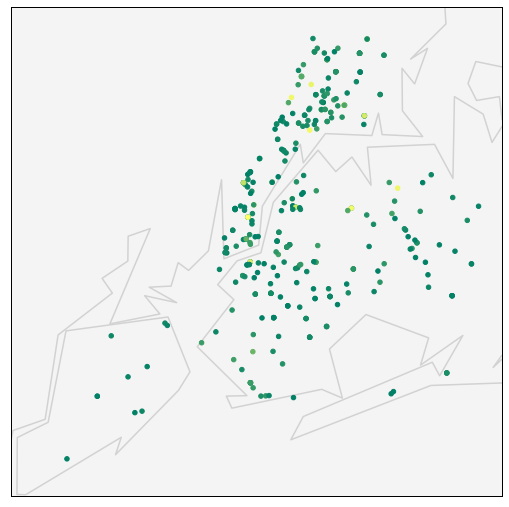

In [45]:
plt.figure(figsize=(9,9))
m_ell = m
m_ell.drawmapboundary(fill_color='#f4f4f4')
m_ell.drawcoastlines(color='#d2d2d2', linewidth=1.5)
m_ell.drawrivers(color='#d2d2d2', linewidth=1.5)
m_ell.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined['ell_percent'], cmap='summer')
plt.show()

### 6.5 Calculating District-Level Statistics

Unfortunately, due to the number of schools, it's hard to interpret the map above. It looks like uptown Manhattan and parts of Queens have a higher `ell_percent`, but it's difficult to be certain. One way to make very granular statistics easier to read is to aggregate them. In this case, we can aggregate by district, which will enable us to plot `ell_percent` district-by-district instead of school-by-school.

In [46]:
# aggregate values by school district
districts = combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,...,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,...,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,...,12.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,...,12.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,...,12.0,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,-73.949251


### 6.6 Plotting Percent of English Learners by District

Now that the `districts` dataframe has been created, it is easier to plot `ell_percent` by district. The aggregation above also took the means of the lon and lat columns, which then provides the coordinates for the center of each district.

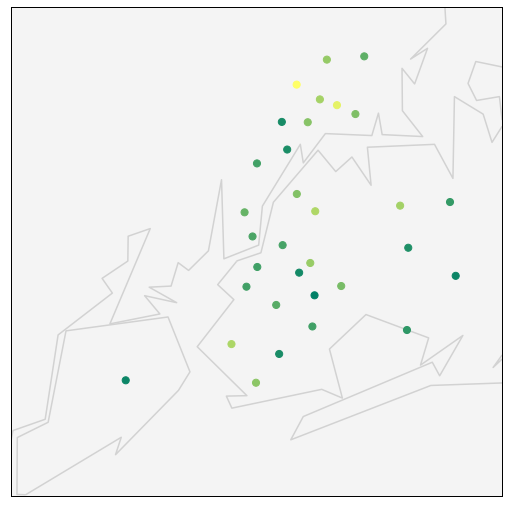

In [47]:
longitudes = districts['lon'].tolist()
latitudes = districts['lat'].tolist()

plt.figure(figsize=(9,9))
m_dist = m
m_dist.drawmapboundary(fill_color='#f4f4f4')
m_dist.drawcoastlines(color='#d2d2d2', linewidth=1.5)
m_dist.drawrivers(color='#d2d2d2', linewidth=1.5)
m_dist.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts['ell_percent'], cmap='summer')
plt.show()

## Conclusion

Based on the scatterplot, it looks like the ELL populations are spread across the city, with specific districts in each borough having the biggest `ell_percent`.